In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<Axes: xlabel='isFraud', ylabel='count'>

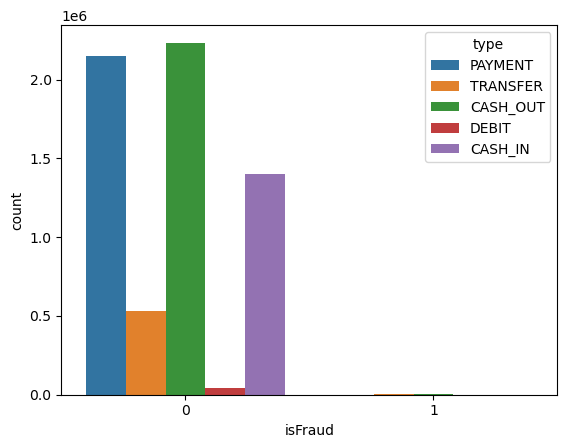

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.countplot(data=df,x='isFraud',hue='type')

In [8]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

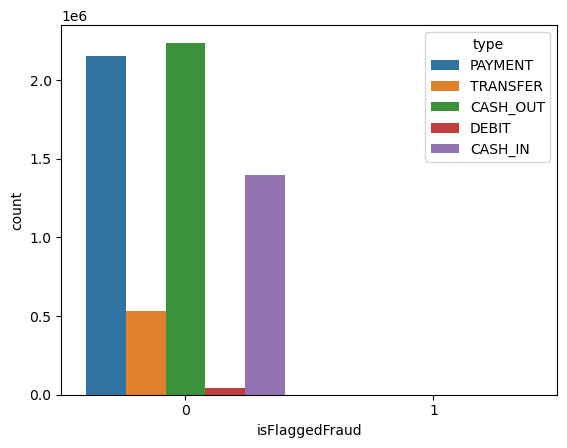

In [9]:
sb.countplot(data=df,x='isFlaggedFraud',hue='type')

In [10]:
df.corr()['isFraud']

/tmp/ipykernel_29/2798939362.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['isFraud']


step              0.031578
amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
Name: isFraud, dtype: float64

/tmp/ipykernel_29/47088976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True,cmap='Blues')


<Axes: >

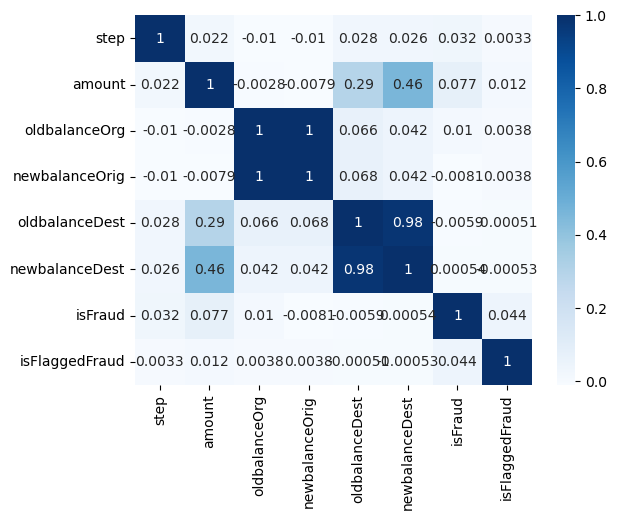

In [15]:
sb.heatmap(df.corr(),annot=True,cmap='Blues')

**Feature Encoding**

In [13]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
sel_col=['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
x=df[sel_col]
y=df['isFraud']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [34]:
model=DecisionTreeClassifier()
model.fit(x_train.values,y_train)
yp=model.predict(x_test.values)
accuracy_score(y_test, yp)

0.9997548179837865

In [35]:
df[sel_col].head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,2,9839.64,170136.0,160296.36,0.0,0.0
1,2,1864.28,21249.0,19384.72,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,2,11668.14,41554.0,29885.86,0.0,0.0


In [36]:
ip=np.array([[1,9839.64,9839.64,0,0.0,0.0]])
if model.predict(ip)==0:
    print('No Fraud')
else:
    print('Fraud')

Fraud


6